## Final Project Submission

Please fill out:
* Student name: Vincent Bahati Mutuku 
* Student pace: full time hybrid
* Scheduled project review date/time: 01/12/2024
* Instructor name: William Okomba 
* Blog post URL:


In [113]:
# Your code here - remember to use markdown cells for comments as well!
# Import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# Display all columns(max of 100 columns)
pd.set_option('display.max_columns', 100)

In [114]:
df = pd.read_csv(r'C:\Users\user\Documents\AviationData\AviationData.csv', encoding='latin1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [115]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Selecting top 30 countries

In [117]:
# Get the top 30 countries by accident and incident 
top_countries = df['Country'].value_counts().index[:30]

# Filter to only include rows where country is in top 100 list  
df = df[df['Country'].isin(top_countries)]

# Remove rows where country is blank
df = df[df['Country'].notna() & df['Country'].str.strip() !='']
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [118]:
# Find the top 30 most common airplane makes
top_makes = df['Make'].value_counts().head(30).index
top_makes

# Filter the DataFrame to only include rows with these top makes
df = df[df['Make'].isin(top_makes)]
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [119]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,NaN,NaN,NaN,NaN,Non-Fatal,NaN,NaN,N4144P,PIPER,PA28,No,NaN,NaN,091,NaN,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,NaN,NaN,NaN,20-12-2022
88881,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N8786U,CESSNA,172F,No,NaN,NaN,091,NSCH,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [120]:
# Converting Event.Date to a datetime format

df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce', dayfirst=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62297 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                62297 non-null  object        
 1   Investigation.Type      62297 non-null  object        
 2   Accident.Number         62297 non-null  object        
 3   Event.Date              62297 non-null  datetime64[ns]
 4   Location                62281 non-null  object        
 5   Country                 62297 non-null  object        
 6   Latitude                19853 non-null  object        
 7   Longitude               19850 non-null  object        
 8   Airport.Code            35845 non-null  object        
 9   Airport.Name            37907 non-null  object        
 10  Injury.Severity         61885 non-null  object        
 11  Aircraft.damage         60672 non-null  object        
 12  Aircraft.Category       18196 non-null  object     

# Data Cleaning

In [121]:
# Checking for NaN values
df.notna().sum()

Event.Id                  62297
Investigation.Type        62297
Accident.Number           62297
Event.Date                62297
Location                  62281
Country                   62297
Latitude                  19853
Longitude                 19850
Airport.Code              35845
Airport.Name              37907
Injury.Severity           61885
Aircraft.damage           60672
Aircraft.Category         18196
Registration.Number       61608
Make                      62297
Model                     62286
Amateur.Built             62243
Number.of.Engines         59722
Engine.Type               59254
FAR.Description           18129
Schedule                   8524
Purpose.of.flight         59285
Air.carrier                9257
Total.Fatal.Injuries      54187
Total.Serious.Injuries    53412
Total.Minor.Injuries      53923
Total.Uninjured           58541
Weather.Condition         60307
Broad.phase.of.flight     48563
Report.Status             59359
Publication.Date          51439
dtype: i

In [122]:
# Checking for missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     16
Country                       0
Latitude                  42444
Longitude                 42447
Airport.Code              26452
Airport.Name              24390
Injury.Severity             412
Aircraft.damage            1625
Aircraft.Category         44101
Registration.Number         689
Make                          0
Model                        11
Amateur.Built                54
Number.of.Engines          2575
Engine.Type                3043
FAR.Description           44168
Schedule                  53773
Purpose.of.flight          3012
Air.carrier               53040
Total.Fatal.Injuries       8110
Total.Serious.Injuries     8885
Total.Minor.Injuries       8374
Total.Uninjured            3756
Weather.Condition          1990
Broad.phase.of.flight     13734
Report.Status              2938
Publication.Date          10858
dtype: i

In [123]:
# Dealing missing values for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Dealing with missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns  # Get categorical columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  
                     
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [124]:
# Removing outliers using IQR
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Selecting numeric columns

# Looping over each numeric column to remove outliers
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers (only keep rows within the bounds)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] 

df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,32.815556,0112457W,NONE,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,UNK,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,32.815556,0112457W,NONE,PRIVATE,Non-Fatal,Substantial,Airplane,N44832,Piper,PA-28-161,No,1.0,Reciprocating,091,UNK,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,32.815556,0112457W,NONE,TUSKEGEE,Non-Fatal,Substantial,Airplane,N4275S,Beech,V35B,No,1.0,Reciprocating,091,UNK,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,32.815556,0112457W,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,Part 91: General Aviation,UNK,Personal,Pilot,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
18,20020917X02481,Accident,NYC82DA016,1982-01-02,"GALETON, PA",United States,32.815556,0112457W,5G6,CHERRY SPRINGS,Non-Fatal,Substantial,Airplane,N25084,Cessna,172,No,1.0,Reciprocating,Part 91: General Aviation,UNK,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,02-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88820,20221128106367,Accident,CEN23LA049,2022-11-24,"Durango, CO",United States,037646N,1074918W,NONE,PRIVATE,Non-Fatal,Substantial,Airplane,N3886D,CESSNA,182A,No,1.0,Reciprocating,091,UNK,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,30-11-2022
88844,20221206106424,Accident,WPR23LA054,2022-12-04,"Fergus Falls, MN",United States,046936N,0096524W,FFM,Fergus Falls Municipal Airport,Non-Fatal,Substantial,Airplane,N926HM,CESSNA,A185F,No,1.0,Reciprocating,091,UNK,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,13-12-2022
88857,20221213106447,Accident,ERA23LA086,2022-12-08,"Covington, GA",United States,332754N,0835049W,NONE,PRIVATE,Non-Fatal,Substantial,Airplane,N900AW,BEECH,A36,No,1.0,Reciprocating,091,UNK,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,28-12-2022
88861,20221215106460,Accident,ERA23LA088,2022-12-10,"Alabaster, AL",United States,331040N,0086470W,EET,PRIVATE,Non-Fatal,Substantial,Airplane,N5301G,CESSNA,305A,No,1.0,Reciprocating,091,UNK,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,19-12-2022


In [125]:
# Checking duplicates
df.duplicated().sum()

0

In [126]:
# Saving the cleaned data
df.to_csv('Aviation_analysis_cleaned_data.csv', index=False)

# Exploratory Data Analysis

## Univariate Analysis
### Accident frequency overtime

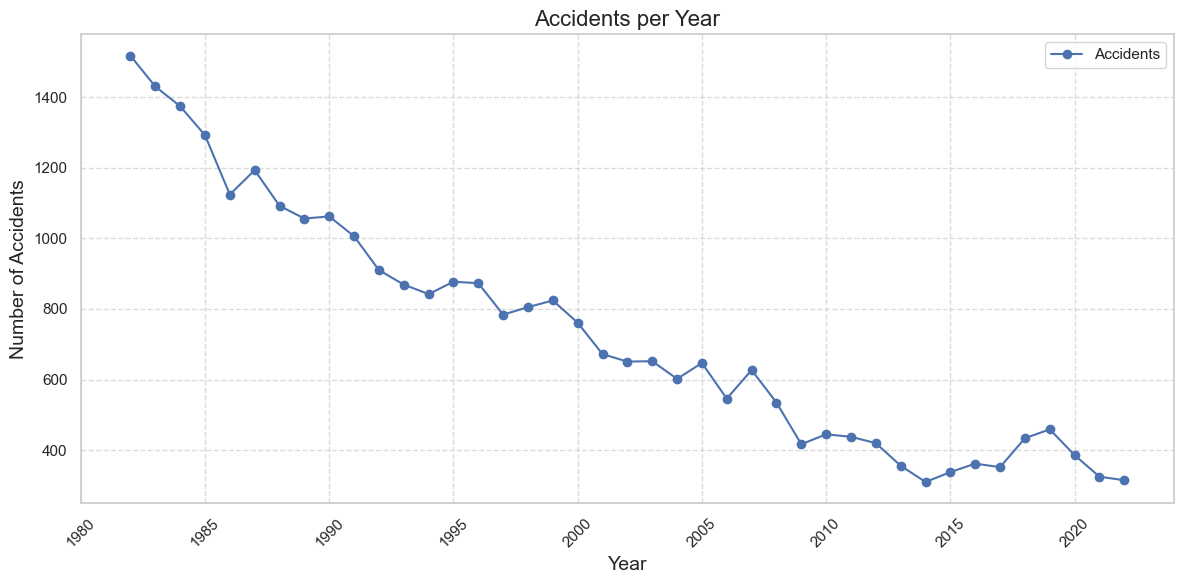

In [142]:
# Confirming 'Event.Date' is a datetime column
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extracting year from the 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Grouping the data by year and count the number of accidents for each year
accidents_by_year = df['Year'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(accidents_by_year.index, accidents_by_year.values, marker='o', linestyle='-', color='b', label='Accidents')
plt.title('Accidents per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

### Accident Severity

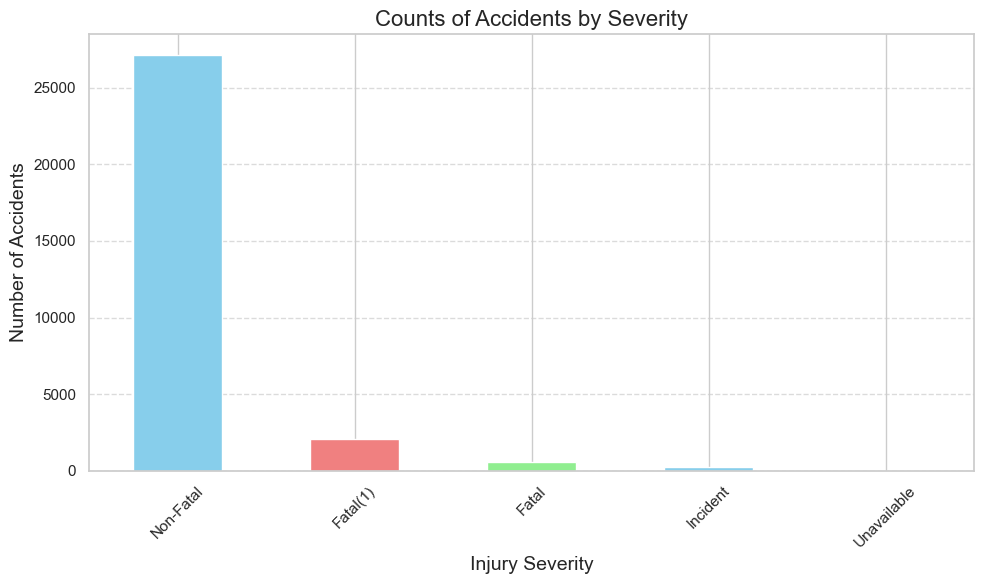

In [128]:
# Grouping the data by 'Injury.Severity' and counting occurrences
severity_counts = df['Injury.Severity'].value_counts()

# Bar Chart: Severity Counts
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Counts of Accidents by Severity', fontsize=16)
plt.xlabel('Injury Severity', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Flight Purpose Accident Analysis

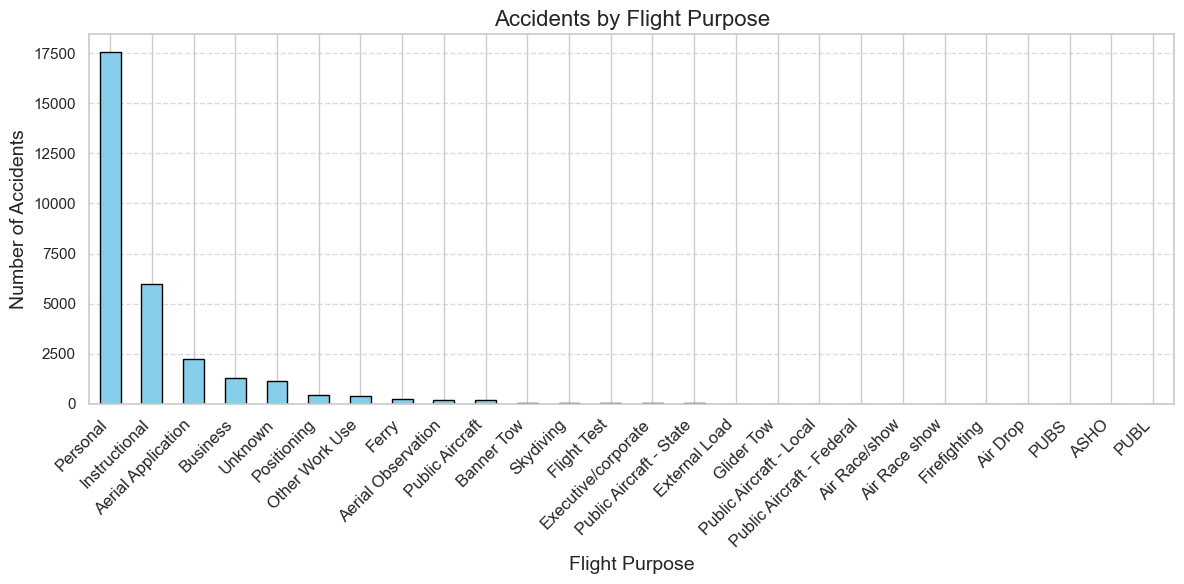

In [129]:
# Grouping data by Purpose of Flight
flight_purpose_counts = df['Purpose.of.flight'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
flight_purpose_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Accidents by Flight Purpose', fontsize=16)
plt.xlabel('Flight Purpose', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Assessing how weather conditions relate to accidents.

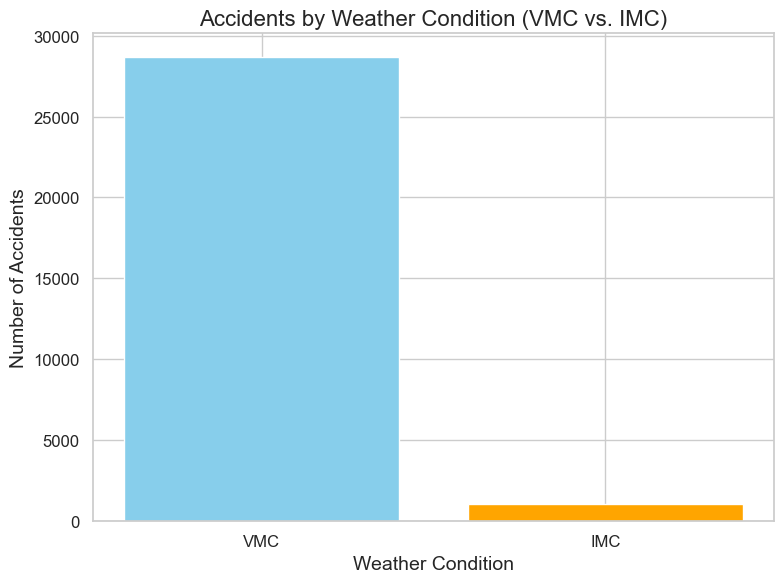

In [130]:
# Filter data for relevant weather conditions
weather_conditions = df['Weather.Condition'].value_counts()

# Keep only VMC and IMC
weather_conditions = weather_conditions[['VMC', 'IMC']]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(weather_conditions.index, weather_conditions.values, color=['skyblue', 'orange'])
plt.title('Accidents by Weather Condition (VMC vs. IMC)', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Accident Frequencies of Airplane Model

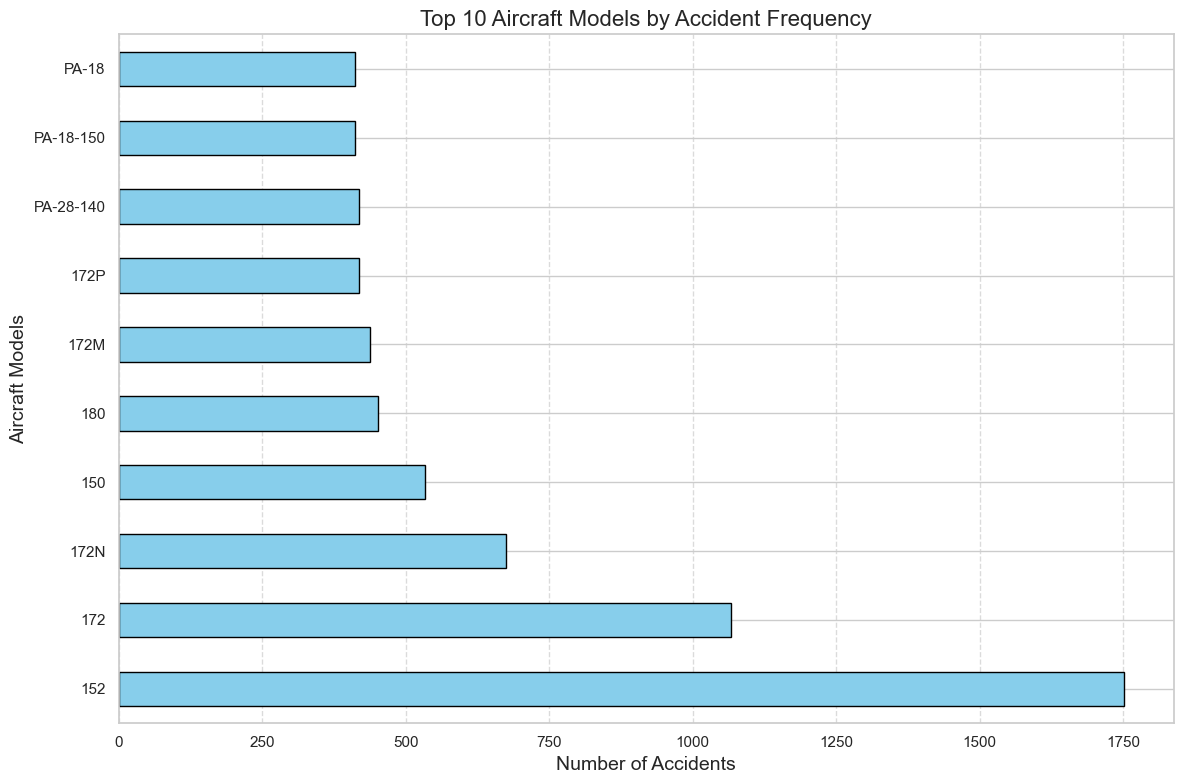

In [131]:
# Grouping the data by top 10 aircraft models and counting accidents
top_models = df['Model'].value_counts().head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
top_models.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Top 10 Aircraft Models by Accident Frequency', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Aircraft Models', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Bivariate Analysis

### Accident Frequency vs Weather conditions

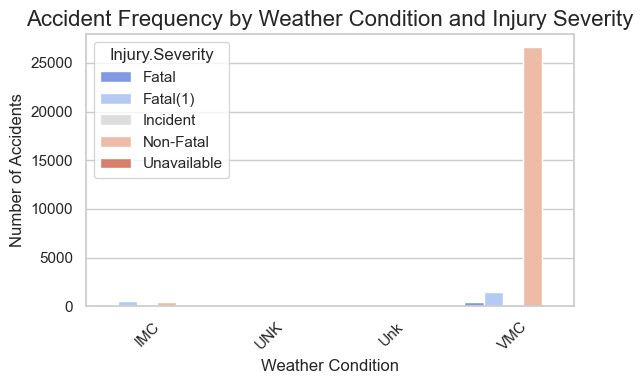

In [146]:
# Filtering out 'UNKNOWN' or NaN values in Aircraft Model
df_filtered = df[df['Model'].notna()]

# Grouping data by Weather.Condition and count accident frequency
weather_counts = df_filtered.groupby(['Weather.Condition', 'Injury.Severity']).size().reset_index(name='Count')

# Ploting Grouped Bar Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=weather_counts, x='Weather.Condition', y='Count', hue='Injury.Severity', palette='coolwarm')
plt.title('Accident Frequency by Weather Condition and Injury Severity', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Accident Frequency vs. Aircraft Model

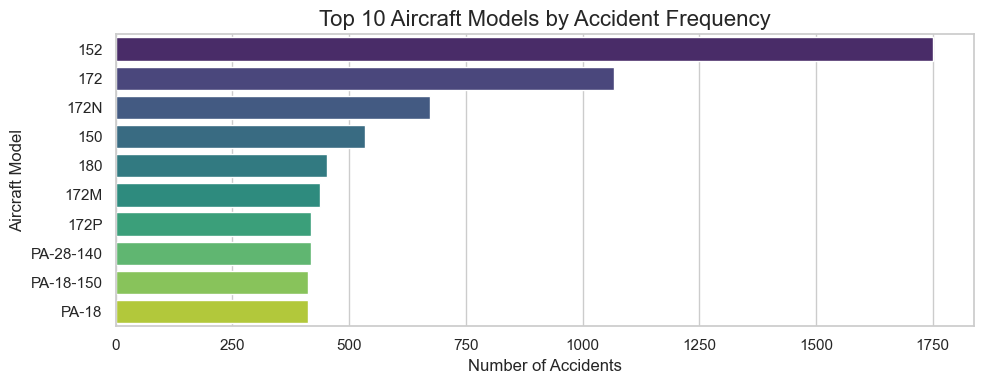

In [147]:
# Filtering out 'UNKNOWN' or NaN values in Aircraft Model
df_filtered = df[df['Model'].notna()]

# Grouping by Aircraft Model and count accidents
model_counts = df_filtered.groupby('Model').size().reset_index(name='Count')

# Sorting by most frequent models
model_counts = model_counts.sort_values('Count', ascending=False).head(10)

# Ploting Horizontal Bar Plot
plt.figure(figsize=(10, 4))
sns.barplot(data=model_counts, x='Count', y='Model', palette='viridis')
plt.title('Top 10 Aircraft Models by Accident Frequency', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Aircraft Model', fontsize=12)
plt.tight_layout()
plt.show()


### Accident Frequency vs. Broad Phase of Flight

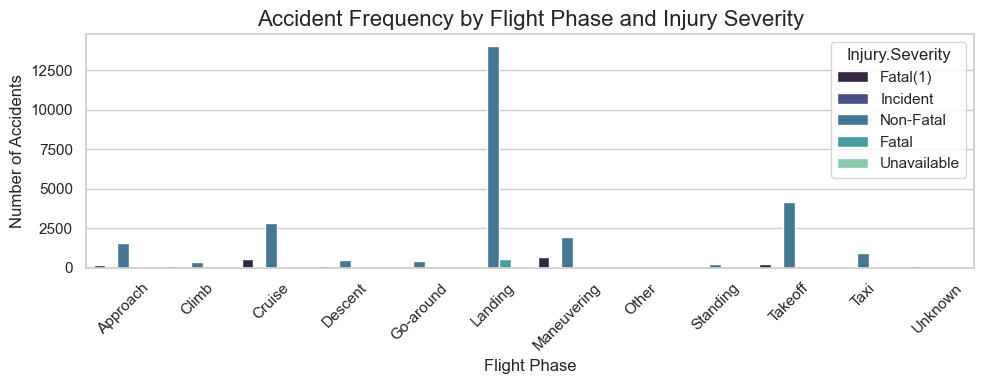

In [148]:
# Filtering out 'UNKNOWN' or NaN values in Broad.phase.of.flight
df_filtered = df[df['Broad.phase.of.flight'].notna()]

# Grouping data by Broad Phase of Flight and Injury Severity
phase_counts = df_filtered.groupby(['Broad.phase.of.flight', 'Injury.Severity']).size().reset_index(name='Count')

# Visualizing Grouped Bar Plot
plt.figure(figsize=(10, 4))
sns.barplot(data=phase_counts, x='Broad.phase.of.flight', y='Count', hue='Injury.Severity', palette='mako')
plt.title('Accident Frequency by Flight Phase and Injury Severity', fontsize=16)
plt.xlabel('Flight Phase', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Accident Frequency vs. Flight Purpose

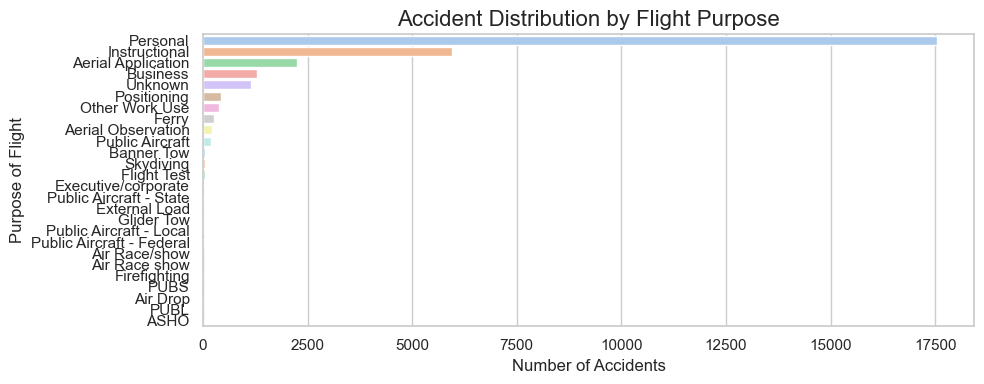

In [149]:
# Filtering out 'UNKNOWN' or NaN values in Purpose.of.flight
df_filtered = df[df['Purpose.of.flight'].notna()]

# Grouping by Purpose of Flight and count accidents
purpose_counts = df_filtered.groupby('Purpose.of.flight').size().reset_index(name='Count')

# Sorting by most frequent flight purposes
purpose_counts = purpose_counts.sort_values('Count', ascending=False)

# Visualizing with a Horizontal Bar Chart
plt.figure(figsize=(10, 4))
sns.barplot(data=purpose_counts, x='Count', y='Purpose.of.flight', palette='pastel')
plt.title('Accident Distribution by Flight Purpose', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Purpose of Flight', fontsize=12)
plt.tight_layout()
plt.show()

### Accident Frequency vs. Aircraft Damage

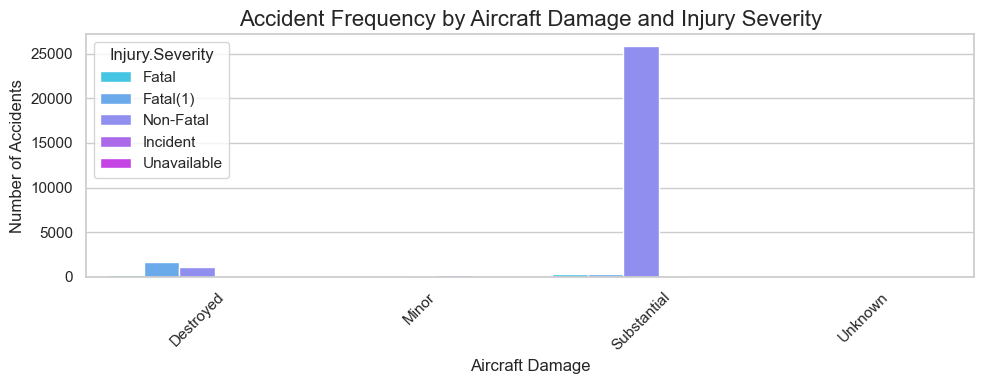

In [150]:
# Filtering out 'UNKNOWN' or NaN values in Aircraft.damage and Injury.Severity
df_filtered = df[(df['Aircraft.damage'].notna()) & (df['Injury.Severity'].notna())]

# Grouping data by Aircraft Damage and Injury Severity
damage_counts = df_filtered.groupby(['Aircraft.damage', 'Injury.Severity']).size().reset_index(name='Count')

# Visualization of Clustered Bar Chart
plt.figure(figsize=(10, 4))
sns.barplot(data=damage_counts, x='Aircraft.damage', y='Count', hue='Injury.Severity', palette='cool')
plt.title('Accident Frequency by Aircraft Damage and Injury Severity', fontsize=16)
plt.xlabel('Aircraft Damage', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
